In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/dago/anaconda3/envs/tp2/bin/python3 (found version "3.6.5") 
-- Found PythonLibs: /home/dago/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
import sys
import numpy as np
import pandas as pd

/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2-alu/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.


# Instancias de train and test


In [3]:
%%time

filename = "../data/train.csv"

def get_data_set(filepath, total_instances):
    df_train = pd.read_csv(filepath)
    df_train = df_train[:total_instances]
    
    # Uso values para mandar todo a arrays de numpy
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y

def main(filename, k, alpha, method, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

    clf = metnum.KNNClassifier(k)
    
    if (method == "KNN"):
        clf.fit(X_train, label_train)
        
    if (method == "KNN_PCA"):
        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
        clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [5]:
%%time
main(filename, 1, 15, "KNN_PCA", 5000, 1000, 0.8, 1e-8)


Accuracy: 0.923
CPU times: user 7.42 s, sys: 447 ms, total: 7.86 s
Wall time: 7.66 s


# Testing -------------------------------------------


In [10]:
# test 1
import numpy as np
A = np.array([[ 62,   4, -52],
 [  4,   4,  -4],
 [-52,  -4,  44]])

w, V = metnum.get_first_eigenvalues(A, 3, 5000, 1e-8)

for i in range(len(A)):
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))
    print(A @ V[:, i])
    print(w[i] * V[:,i])

True
[-81.01699942  -5.84815982  68.23429144]
[-81.01699942  -5.84815982  68.23429144]
True
[-0.485262    3.71464028 -0.25779796]
[-0.485262    3.71464028 -0.25779796]
True
[0.10161836 0.02177798 0.12252162]
[0.10161836 0.02177798 0.12252162]


In [18]:
def get_x_by_label(data, labels, label ):
    result_x = []
    result_y = []
    for i in range(0,len(data)):
        if (labels[i] == label):
            result_x.append(data[i][0])
            result_y.append(data[i][1])
    return result_x, result_y

In [84]:
# Test 2 PCA
filename = "../data/train.csv"
alpha = 2
k = 1
total_instances = 100
train_percentage = 0.95
num_iter = 1000
epsilon = 1e-10

X, y = get_data_set(filename, total_instances)

# take some instances for train and other for validation
limit = int(train_percentage * X.shape[0]) 

X_train, label_train = X[:limit], y[:limit]
X_val, label_val = X[limit:], y[limit:]

assert len(X_train) == len(label_train)
assert len(X_val) == len(label_val)

clf = metnum.KNNClassifier(k)

pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

clf.fit(X_train, label_train) 

from sklearn.metrics import accuracy_score
label_pred = clf.predict(X_val)

acc = accuracy_score(label_val, label_pred)
print("Accuracy: {}".format(acc))




Accuracy: 0.6


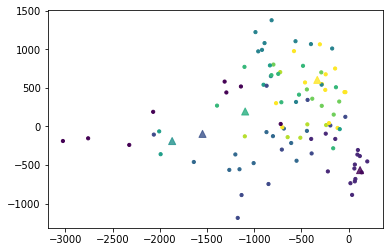

In [90]:
plt.scatter(X_train[:,0], X_train[:,1],s=10 ,c = label_train, alpha = 1)
plt.scatter(X_val[:,0], X_val[:,1], c = label_pred, s = 50, marker='^', alpha = 0.8)

plt.show()


# Implementación
- En el metodo de la potencia verificamos al final que se trate de un autovector de X con precision epsilon
- 

# Metodo para parar el metodo de la potencia
- research
- - http://www.cse.psu.edu/~b58/cse456/lecture11.pdf
- - || wk - wk+1 || inf < e
- - https://www-users.cs.umn.edu/~saad/eig_book_2ndEd.pdf
- - pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual

- - talvez se puede usar lambda -> descartado porque habia que computar el autovalor adentro del ciclo en cada iteracion, lo cual es cosotoso.
- elegir 2/3 metodos y evaluar su eficiencia en base a la perfomance de tiempo y a distancia de los resultados obtenidos

In [5]:
%%time
# Sin método de terminación
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")

# Accuracy: 0.923
# Iteration:  1000  time:  8.2160
        
# Accuracy: 0.923
# Iteration:  2000  time:  10.8136
        
# Accuracy: 0.923
# Iteration:  3000  time:  12.2737

 33%|███▎      | 1/3 [00:08<00:16,  8.22s/it]

Accuracy: 0.923
Iteration:  1000  time:  8.2160


 67%|██████▋   | 2/3 [00:19<00:09,  9.74s/it]

Accuracy: 0.923
Iteration:  2000  time:  10.8136


100%|██████████| 3/3 [00:31<00:00, 10.44s/it]

Accuracy: 0.923
Iteration:  3000  time:  12.2737
CPU times: user 30.7 s, sys: 762 ms, total: 31.4 s
Wall time: 31.3 s


In [4]:
# || wk - wk+1 || inf < e
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# considerar que b es random por eso los resultados
# Accuracy: 0.923
# Iteration:  1000  time:  4.7722
        
# Accuracy: 0.923
# Iteration:  2000  time:  4.5494
        
# Accuracy: 0.923
# Iteration:  3000  time:  4.5293

 33%|███▎      | 1/3 [00:05<00:10,  5.42s/it]

Accuracy: 0.923
Iteration:  1000  time:  5.4148


 67%|██████▋   | 2/3 [00:10<00:05,  5.05s/it]

Accuracy: 0.923
Iteration:  2000  time:  4.7880


100%|██████████| 3/3 [00:14<00:00,  4.98s/it]

Accuracy: 0.923
Iteration:  3000  time:  4.7343


In [5]:
# pag 59(69) seccion 3.2: r = Au~ - lambda~u~, r es el vector residual
for iterations in tqdm([1000, 2000, 3000]):
    time_init = time.perf_counter()
    main(filename, 1, 15, "KNN_PCA", 5000, iterations, 0.8, 1e-8)
    time_end = time.perf_counter()
    print("Iteration: ", iterations, " time: ", f"{time_end- time_init:0.4f}")
    
# Accuracy: 0.923
# Iteration:  1000  time:  6.3910
        
# Accuracy: 0.923
# Iteration:  2000  time:  6.1160
        
# Accuracy: 0.923
# Iteration:  3000  time:  6.4459  

 33%|███▎      | 1/3 [00:06<00:13,  6.97s/it]

Accuracy: 0.923
Iteration:  1000  time:  6.9683


 67%|██████▋   | 2/3 [00:13<00:06,  6.60s/it]

Accuracy: 0.923
Iteration:  2000  time:  6.3405


100%|██████████| 3/3 [00:19<00:00,  6.45s/it]

Accuracy: 0.923
Iteration:  3000  time:  6.0369


**Decidimos quedarnos con el primer criterio ya que al no calcular los autovalores en cada iteracíon obtuvo una perfomance mejor que el 2do criterio de finalizacion para el método de la potencia. Y ademas observamos que las iteraciones se vieron altamente reducidas(Mejora con la cantidad de iteraciones, ya que cuando converge el resto de las iteraciones son innecesarias)**

# Experimentar con la k
- Encontrar primero del 1 al 200 de a saltos de a 10
- Hipotesis: va a estar entre los primeros ya que tener en cuenta demasiados puntos mas cercanos deja de tener sentido
- Luego concluir que esta entre los primeros y hacer del 1 al 20

*Vamos a experimentar con: Intancias 10000, porcentage 0.8, epsilon 1e-8, iteraciones 1000(Si en 1000 no convergio nos conviene tomar un nuevo X0)*

## KNN sin PCA

In [9]:
def plot_accuracy_KNN(filename, title):
    columns = ["k", "time", "acc"]
    df = pd.read_csv(filename, names=columns)

    ks = df["k"]
    accuracy = df["acc"]
    
    plt.plot(ks, accuracy, 'o-')
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.title(title)
    
    plt.show()
    

In [5]:
name = "../dataExp/expKNN_1-200.csv"
accuracy = []
times = []

total_instances = 10000
it_range = [1] + list(range(10,201,10))
                    
for k in tqdm(it_range):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 1000, 0.8, 1e-8)
    time_end = time.perf_counter()
    
    times.append(time_end-time_init)
    accuracy.append(acc)
np.savetxt(name, np.array([it_range, times, accuracy]).transpose(), delimiter=",")

  5%|▍         | 1/21 [00:18<06:03, 18.18s/it]

Accuracy: 0.952


 10%|▉         | 2/21 [00:37<05:55, 18.71s/it]

Accuracy: 0.9385


 14%|█▍        | 3/21 [00:56<05:38, 18.80s/it]

Accuracy: 0.934


 19%|█▉        | 4/21 [01:14<05:18, 18.74s/it]

Accuracy: 0.924


 24%|██▍       | 5/21 [01:33<05:00, 18.80s/it]

Accuracy: 0.9145


 29%|██▊       | 6/21 [01:53<04:45, 19.02s/it]

Accuracy: 0.9095


 33%|███▎      | 7/21 [02:12<04:29, 19.22s/it]

Accuracy: 0.9035


 38%|███▊      | 8/21 [02:32<04:12, 19.42s/it]

Accuracy: 0.899


 43%|████▎     | 9/21 [02:53<03:58, 19.89s/it]

Accuracy: 0.893


 48%|████▊     | 10/21 [03:14<03:43, 20.30s/it]

Accuracy: 0.8875


 52%|█████▏    | 11/21 [03:36<03:28, 20.80s/it]

Accuracy: 0.884


 57%|█████▋    | 12/21 [03:59<03:12, 21.37s/it]

Accuracy: 0.8785


 62%|██████▏   | 13/21 [04:22<02:55, 21.89s/it]

Accuracy: 0.873


 67%|██████▋   | 14/21 [04:45<02:36, 22.34s/it]

Accuracy: 0.8695


 71%|███████▏  | 15/21 [05:09<02:16, 22.78s/it]

Accuracy: 0.869


 76%|███████▌  | 16/21 [05:34<01:56, 23.31s/it]

Accuracy: 0.864


 81%|████████  | 17/21 [05:59<01:35, 23.87s/it]

Accuracy: 0.8615


 86%|████████▌ | 18/21 [06:24<01:12, 24.26s/it]

Accuracy: 0.8565


 90%|█████████ | 19/21 [06:50<00:49, 24.66s/it]

Accuracy: 0.8525


 95%|█████████▌| 20/21 [07:16<00:25, 25.31s/it]

Accuracy: 0.848


100%|██████████| 21/21 [07:44<00:00, 22.10s/it]

Accuracy: 0.844


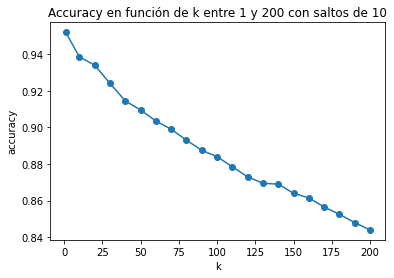

In [10]:
name = "../dataExp/expKNN_1-200.csv"
plot_accuracy_KNN(name, "Accuracy en función de k entre 1 y 200 con saltos de 10")

In [7]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
accuracy_1_10 = []
times_1_10 = []

total_instances = 10000
it_range = range(1,11)

for k in tqdm(it_range):
    time_init = time.perf_counter()
    acc = main("../data/train.csv", k, 0, "KNN", total_instances, 1000, 0.8, 1e-8)
    time_end = time.perf_counter()
    
    times_1_10.append(time_end-time_init)
    accuracy_1_10.append(acc)
np.savetxt(name_1_10, np.array([it_range, times_1_10, accuracy_1_10]).transpose(), delimiter=",")

 10%|█         | 1/10 [00:16<02:29, 16.58s/it]

Accuracy: 0.952


 20%|██        | 2/10 [00:33<02:14, 16.79s/it]

Accuracy: 0.9325


 30%|███       | 3/10 [00:50<01:58, 16.91s/it]

Accuracy: 0.9505


 40%|████      | 4/10 [01:07<01:41, 16.90s/it]

Accuracy: 0.945


 50%|█████     | 5/10 [01:24<01:25, 17.07s/it]

Accuracy: 0.9525


 60%|██████    | 6/10 [01:42<01:08, 17.21s/it]

Accuracy: 0.946


 70%|███████   | 7/10 [02:00<00:52, 17.37s/it]

Accuracy: 0.9445


 80%|████████  | 8/10 [02:17<00:34, 17.48s/it]

Accuracy: 0.944


 90%|█████████ | 9/10 [02:35<00:17, 17.64s/it]

Accuracy: 0.943


100%|██████████| 10/10 [02:52<00:00, 17.30s/it]

Accuracy: 0.9385


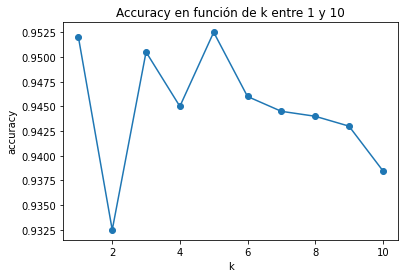

In [11]:
name_1_10 = "../dataExp/expKNN_1-10.csv"
plot_accuracy_KNN(name_1_10, "Accuracy en función de k entre 1 y 10")

## KNN con PCA 
0 < alpha < 500, [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500] 

0 < k < 200 [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

In [9]:
def main_pca(filename, alpha, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

        
    pca = metnum.PCA(alpha, num_iter, epsilon)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)

    return X_train, X_val, label_train, label_val

def main_knn(k, X_train, X_val, label_train, label_val):
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

# experimenta con un set de alpha y ks
def experimentacion_k_alpha(namefile, ks, alphas, total_intances):
    accuracy_k_alpha_complete = []
    times_k_alpha_complete = []
    ks_complete = []
    alphas_complete = []
    cant_it = 2500
    eps = 1e-6
    
    with tqdm(total=len(ks) * len(alphas)) as pbar:
        for alpha in alphas:
            time_init_pca = time.perf_counter()
            X_train, X_val, label_train, label_val = main_pca("../data/train.csv", alpha, total_instances, cant_it, 0.8, eps)
            time_end_pca = time.perf_counter()
            time_pca = time_end_pca - time_init_pca
            
            for k in ks:
                time_init = time.perf_counter()
                acc = main_knn(k, X_train, X_val, label_train, label_val)
                time_end = time.perf_counter()
                print(f"K: {k}, Alpha: {alpha}")

                times_k_alpha_complete.append(time_end-time_init+time_pca)
                accuracy_k_alpha_complete.append(acc)
                ks_complete.append(k)
                alphas_complete.append(alpha)

                pbar.update(1)
   
    np.savetxt(namefile, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

In [12]:
# experimenta con un set de alpha y ks
def experimentacion_k_alpha_deprecated(namefile, ks, alphas, total_intances):
    accuracy_k_alpha_complete = []
    times_k_alpha_complete = []
    ks_complete = []
    alphas_complete = []

    with tqdm(total=len(ks) * len(alphas)) as pbar:
        for k in ks:
            for alpha in alphas:
                time_init = time.perf_counter()
                acc = main("../data/train.csv", k, alpha, "KNN_PCA", total_instances, 2500, 0.8, 1e-6)
                time_end = time.perf_counter()
                print(f"K: {k}, Alpha: {alpha}")

                times_k_alpha_complete.append(time_end-time_init)
                accuracy_k_alpha_complete.append(acc)
                ks_complete.append(k)
                alphas_complete.append(alpha)

                pbar.update(1)

    np.savetxt(namefile, np.array([ks_complete, alphas_complete, times_k_alpha_complete, accuracy_k_alpha_complete]).transpose(), delimiter=",")

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams

# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter(filename, title, size = (7,4)):
    columns = ["k", "alpha", "time", "acc"]
    df = pd.read_csv(filename, names=columns)
    plot_scatter_df(df, title, size)
    
# Grafica los datos obtenidos para los distintos k y alpha
def plot_scatter_df(df, title, size = (7,4)):
    x = [str(i)[0:-2] for i in df["alpha"]]
    y = [str(i)[0:-2] for i in df["k"]]

    fig = plt.figure()
    colour = df["acc"]
    plt.scatter(x, y, s = 70, c = colour, alpha = 1, cmap="rainbow")
    plt.colorbar(label="accuracy")
    plt.xlabel("alpha")
    plt.ylabel('k',rotation=0)
    plt.title(title)
    plt.rcParams["figure.figsize"] = size
    plt.show()

In [11]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)


  1%|▏         | 2/144 [00:05<05:03,  2.14s/it]

Accuracy: 0.2515
K: 1, Alpha: 1
Accuracy: 0.2615
K: 2, Alpha: 1


  2%|▏         | 3/144 [00:05<02:58,  1.27s/it]

Accuracy: 0.2735
K: 3, Alpha: 1


  3%|▎         | 4/144 [00:05<02:02,  1.14it/s]

Accuracy: 0.2725
K: 4, Alpha: 1


  3%|▎         | 5/144 [00:05<01:34,  1.47it/s]

Accuracy: 0.277
K: 5, Alpha: 1


  4%|▍         | 6/144 [00:06<01:29,  1.54it/s]

Accuracy: 0.2985
K: 10, Alpha: 1


  4%|▍         | 6/144 [00:07<02:55,  1.27s/it]


KeyboardInterrupt: 

- Graficos: 15 graficos con k fijo, acc(alpha)
- Mismo grafico todos overlapeados
- Alpha en X, k en Y, colorcitos para rangos de acc(rojo, amarrillo verde)


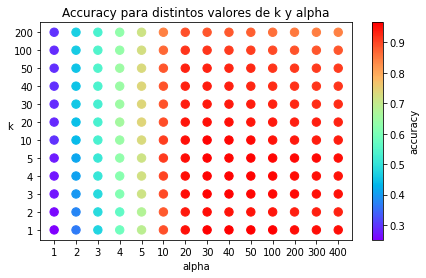

In [44]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
plot_scatter(name_k_alpha_complete, "Accuracy para distintos valores de k y alpha")


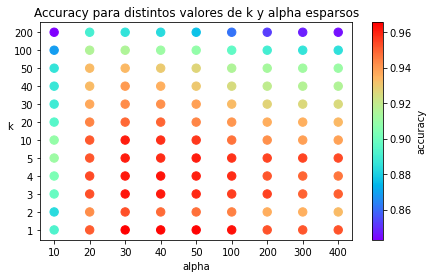

In [47]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(name_k_alpha_complete, names=columns)
#df_k_limit = df[df["k"] < 10]
df_alpha_limit = df[df["alpha"] >= 10] 

plot_scatter_df(df_alpha_limit, "Accuracy para distintos valores de k y alpha esparsos")

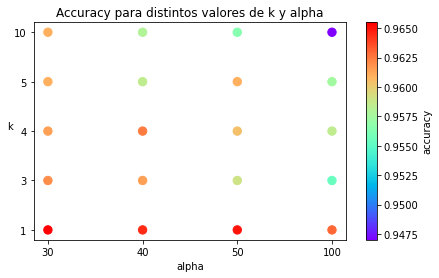

In [48]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(name_k_alpha_complete, names=columns)
df = df[df["k"] < 20]
df = df[df["k"] != 2]
df = df[df["alpha"] > 20]
df = df[df["alpha"] <= 100]

plot_scatter_df(df, "Accuracy para distintos valores de k y alpha")

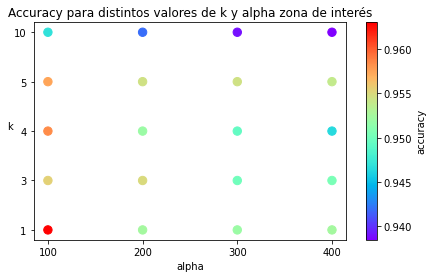

In [49]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete.csv"
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(name_k_alpha_complete, names=columns)
df = df[df["k"] < 20]
df = df[df["k"] != 2]
df = df[df["alpha"] >= 100]

plot_scatter_df(df, "Accuracy para distintos valores de k y alpha zona de interés")

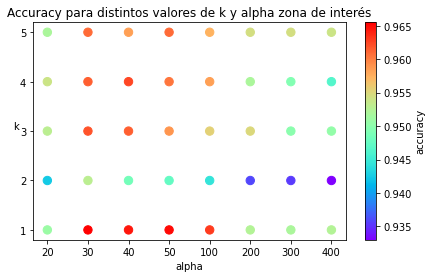

In [50]:
import matplotlib.pyplot as plt
import numpy as np

filename = "../dataExp/KNN_PCA_complete.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df_k_limit = df[df["k"] < 10]
df_alpha_limit = df_k_limit[df_k_limit["alpha"] > 10] 

plot_scatter_df(df_alpha_limit, "Accuracy para distintos valores de k y alpha zona de interés")

In [18]:
name_k_alpha_complete = "../dataExp/KNN_PCA_complete_400.csv"
total_instances = 10000
ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
alphas = [400]

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)


  8%|▊         | 1/12 [11:59<2:11:58, 719.89s/it]

Accuracy: 0.9525
K: 1, Alpha: 400


 17%|█▋        | 2/12 [12:06<50:04, 300.50s/it]  

Accuracy: 0.933
K: 2, Alpha: 400


 25%|██▌       | 3/12 [12:13<24:58, 166.48s/it]

Accuracy: 0.9505
K: 3, Alpha: 400


 33%|███▎      | 4/12 [12:20<13:48, 103.52s/it]

Accuracy: 0.9465
K: 4, Alpha: 400


 42%|████▏     | 5/12 [12:27<08:01, 68.74s/it] 

Accuracy: 0.954
K: 5, Alpha: 400


 50%|█████     | 6/12 [12:35<04:46, 47.82s/it]

Accuracy: 0.9385
K: 10, Alpha: 400


 58%|█████▊    | 7/12 [12:42<02:53, 34.71s/it]

Accuracy: 0.9335
K: 20, Alpha: 400


 67%|██████▋   | 8/12 [12:51<01:45, 26.31s/it]

Accuracy: 0.9255
K: 30, Alpha: 400


 75%|███████▌  | 9/12 [13:00<01:02, 20.86s/it]

Accuracy: 0.916
K: 40, Alpha: 400


 83%|████████▎ | 10/12 [13:09<00:34, 17.29s/it]

Accuracy: 0.9105
K: 50, Alpha: 400


 92%|█████████▏| 11/12 [13:21<00:15, 15.62s/it]

Accuracy: 0.885
K: 100, Alpha: 400


100%|██████████| 12/12 [13:38<00:00, 68.17s/it]

Accuracy: 0.8455
K: 200, Alpha: 400


In [24]:
name_k_alpha_complete = "../dataExp/KNN_PCA_extense.csv"
total_instances = 10000
ks = range(1,11)
alphas = range(10,101,5)

experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)

  1%|          | 1/190 [00:04<15:10,  4.82s/it]

Accuracy: 0.8925
K: 1, Alpha: 10


  1%|          | 2/190 [00:05<06:39,  2.12s/it]

Accuracy: 0.8835
K: 2, Alpha: 10


  2%|▏         | 3/190 [00:05<04:00,  1.29s/it]

Accuracy: 0.8985
K: 3, Alpha: 10


  2%|▏         | 4/190 [00:05<02:50,  1.09it/s]

Accuracy: 0.9035
K: 4, Alpha: 10


  3%|▎         | 5/190 [00:06<02:14,  1.38it/s]

Accuracy: 0.911
K: 5, Alpha: 10


  3%|▎         | 6/190 [00:06<01:55,  1.59it/s]

Accuracy: 0.9055
K: 6, Alpha: 10


  4%|▎         | 7/190 [00:07<01:46,  1.71it/s]

Accuracy: 0.9065
K: 7, Alpha: 10


  4%|▍         | 8/190 [00:07<01:43,  1.76it/s]

Accuracy: 0.9105
K: 8, Alpha: 10


  5%|▍         | 9/190 [00:08<01:44,  1.74it/s]

Accuracy: 0.91
K: 9, Alpha: 10


  5%|▌         | 10/190 [00:08<01:48,  1.66it/s]

Accuracy: 0.9095
K: 10, Alpha: 10


  6%|▌         | 11/190 [00:14<06:23,  2.14s/it]

Accuracy: 0.9285
K: 1, Alpha: 15


  6%|▋         | 12/190 [00:14<04:41,  1.58s/it]

Accuracy: 0.925
K: 2, Alpha: 15


  7%|▋         | 13/190 [00:15<03:33,  1.20s/it]

Accuracy: 0.934
K: 3, Alpha: 15


  7%|▋         | 14/190 [00:15<02:48,  1.04it/s]

Accuracy: 0.941
K: 4, Alpha: 15


  8%|▊         | 15/190 [00:15<02:20,  1.24it/s]

Accuracy: 0.9415
K: 5, Alpha: 15


  8%|▊         | 16/190 [00:16<02:03,  1.40it/s]

Accuracy: 0.943
K: 6, Alpha: 15


  9%|▉         | 17/190 [00:16<01:54,  1.51it/s]

Accuracy: 0.937
K: 7, Alpha: 15


  9%|▉         | 18/190 [00:17<01:50,  1.56it/s]

Accuracy: 0.936
K: 8, Alpha: 15


 10%|█         | 19/190 [00:18<01:49,  1.56it/s]

Accuracy: 0.9355
K: 9, Alpha: 15


 11%|█         | 20/190 [00:18<01:51,  1.53it/s]

Accuracy: 0.9385
K: 10, Alpha: 15


 11%|█         | 21/190 [00:25<06:29,  2.31s/it]

Accuracy: 0.951
K: 1, Alpha: 20


 12%|█▏        | 22/190 [00:25<04:49,  1.73s/it]

Accuracy: 0.9425
K: 2, Alpha: 20


 12%|█▏        | 23/190 [00:25<03:42,  1.33s/it]

Accuracy: 0.953
K: 3, Alpha: 20


 13%|█▎        | 24/190 [00:26<02:58,  1.07s/it]

Accuracy: 0.954
K: 4, Alpha: 20


 13%|█▎        | 25/190 [00:26<02:30,  1.10it/s]

Accuracy: 0.952
K: 5, Alpha: 20


 14%|█▎        | 26/190 [00:27<02:12,  1.23it/s]

Accuracy: 0.954
K: 6, Alpha: 20


 14%|█▍        | 27/190 [00:28<02:02,  1.33it/s]

Accuracy: 0.9545
K: 7, Alpha: 20


 15%|█▍        | 28/190 [00:28<01:59,  1.36it/s]

Accuracy: 0.9545
K: 8, Alpha: 20


 15%|█▌        | 29/190 [00:29<01:59,  1.35it/s]

Accuracy: 0.9505
K: 9, Alpha: 20


 16%|█▌        | 30/190 [00:30<02:00,  1.33it/s]

Accuracy: 0.9515
K: 10, Alpha: 20


 16%|█▋        | 31/190 [00:37<06:46,  2.56s/it]

Accuracy: 0.963
K: 1, Alpha: 25


 17%|█▋        | 32/190 [00:37<05:02,  1.91s/it]

Accuracy: 0.9495
K: 2, Alpha: 25


 17%|█▋        | 33/190 [00:37<03:51,  1.48s/it]

Accuracy: 0.9575
K: 3, Alpha: 25


 18%|█▊        | 34/190 [00:38<03:05,  1.19s/it]

Accuracy: 0.96
K: 4, Alpha: 25


 18%|█▊        | 35/190 [00:38<02:35,  1.00s/it]

Accuracy: 0.9545
K: 5, Alpha: 25


 19%|█▉        | 36/190 [00:39<02:16,  1.13it/s]

Accuracy: 0.958
K: 6, Alpha: 25


 19%|█▉        | 37/190 [00:40<02:05,  1.22it/s]

Accuracy: 0.952
K: 7, Alpha: 25


 20%|██        | 38/190 [00:41<02:01,  1.25it/s]

Accuracy: 0.9555
K: 8, Alpha: 25


 21%|██        | 39/190 [00:41<01:59,  1.26it/s]

Accuracy: 0.9535
K: 9, Alpha: 25


 21%|██        | 40/190 [00:42<02:02,  1.23it/s]

Accuracy: 0.955
K: 10, Alpha: 25


 22%|██▏       | 41/190 [00:49<06:30,  2.62s/it]

Accuracy: 0.9655
K: 1, Alpha: 30


 22%|██▏       | 42/190 [00:50<04:55,  1.99s/it]

Accuracy: 0.953
K: 2, Alpha: 30


 23%|██▎       | 43/190 [00:50<03:51,  1.57s/it]

Accuracy: 0.962
K: 3, Alpha: 30


 23%|██▎       | 44/190 [00:51<03:08,  1.29s/it]

Accuracy: 0.9615
K: 4, Alpha: 30


 24%|██▎       | 45/190 [00:51<02:42,  1.12s/it]

Accuracy: 0.961
K: 5, Alpha: 30


 24%|██▍       | 46/190 [00:52<02:25,  1.01s/it]

Accuracy: 0.9595
K: 6, Alpha: 30


 25%|██▍       | 47/190 [00:53<02:15,  1.06it/s]

Accuracy: 0.9565
K: 7, Alpha: 30


 25%|██▌       | 48/190 [00:54<02:10,  1.09it/s]

Accuracy: 0.9605
K: 8, Alpha: 30


 26%|██▌       | 49/190 [00:55<02:09,  1.09it/s]

Accuracy: 0.959
K: 9, Alpha: 30


 26%|██▋       | 50/190 [00:56<02:09,  1.08it/s]

Accuracy: 0.9605
K: 10, Alpha: 30


 27%|██▋       | 51/190 [01:03<06:21,  2.75s/it]

Accuracy: 0.9675
K: 1, Alpha: 35


 27%|██▋       | 52/190 [01:03<04:48,  2.09s/it]

Accuracy: 0.956
K: 2, Alpha: 35


 28%|██▊       | 53/190 [01:04<03:46,  1.65s/it]

Accuracy: 0.9635
K: 3, Alpha: 35


 28%|██▊       | 54/190 [01:05<03:05,  1.36s/it]

Accuracy: 0.96
K: 4, Alpha: 35


 29%|██▉       | 55/190 [01:05<02:38,  1.17s/it]

Accuracy: 0.961
K: 5, Alpha: 35


 29%|██▉       | 56/190 [01:06<02:21,  1.05s/it]

Accuracy: 0.9595
K: 6, Alpha: 35


 30%|███       | 57/190 [01:07<02:10,  1.02it/s]

Accuracy: 0.96
K: 7, Alpha: 35


 31%|███       | 58/190 [01:08<02:05,  1.05it/s]

Accuracy: 0.96
K: 8, Alpha: 35


 31%|███       | 59/190 [01:09<02:04,  1.06it/s]

Accuracy: 0.962
K: 9, Alpha: 35


 32%|███▏      | 60/190 [01:10<02:04,  1.04it/s]

Accuracy: 0.961
K: 10, Alpha: 35


 32%|███▏      | 61/190 [01:18<06:45,  3.14s/it]

Accuracy: 0.9645
K: 1, Alpha: 40


 33%|███▎      | 62/190 [01:19<05:10,  2.43s/it]

Accuracy: 0.9485
K: 2, Alpha: 40


 33%|███▎      | 63/190 [01:19<04:03,  1.92s/it]

Accuracy: 0.9615
K: 3, Alpha: 40


 34%|███▎      | 64/190 [01:20<03:18,  1.58s/it]

Accuracy: 0.9625
K: 4, Alpha: 40


 34%|███▍      | 65/190 [01:21<02:49,  1.36s/it]

Accuracy: 0.9585
K: 5, Alpha: 40


 35%|███▍      | 66/190 [01:22<02:32,  1.23s/it]

Accuracy: 0.959
K: 6, Alpha: 40


 35%|███▌      | 67/190 [01:23<02:21,  1.15s/it]

Accuracy: 0.9565
K: 7, Alpha: 40


 36%|███▌      | 68/190 [01:24<02:14,  1.10s/it]

Accuracy: 0.958
K: 8, Alpha: 40


 36%|███▋      | 69/190 [01:25<02:12,  1.10s/it]

Accuracy: 0.9575
K: 9, Alpha: 40


 37%|███▋      | 70/190 [01:26<02:13,  1.12s/it]

Accuracy: 0.958
K: 10, Alpha: 40


 37%|███▋      | 71/190 [01:34<06:20,  3.19s/it]

Accuracy: 0.9655
K: 1, Alpha: 45


 38%|███▊      | 72/190 [01:35<04:49,  2.45s/it]

Accuracy: 0.9515
K: 2, Alpha: 45


 38%|███▊      | 73/190 [01:36<03:47,  1.94s/it]

Accuracy: 0.9605
K: 3, Alpha: 45


 39%|███▉      | 74/190 [01:37<03:06,  1.61s/it]

Accuracy: 0.963
K: 4, Alpha: 45


 39%|███▉      | 75/190 [01:37<02:39,  1.39s/it]

Accuracy: 0.96
K: 5, Alpha: 45


 40%|████      | 76/190 [01:38<02:22,  1.25s/it]

Accuracy: 0.958
K: 6, Alpha: 45


 41%|████      | 77/190 [01:39<02:13,  1.18s/it]

Accuracy: 0.955
K: 7, Alpha: 45


 41%|████      | 78/190 [01:40<02:07,  1.14s/it]

Accuracy: 0.959
K: 8, Alpha: 45


 42%|████▏     | 79/190 [01:42<02:05,  1.13s/it]

Accuracy: 0.957
K: 9, Alpha: 45


 43%|████▎     | 81/190 [01:51<05:56,  3.28s/it]

Accuracy: 0.9575
K: 10, Alpha: 45
Accuracy: 0.965
K: 1, Alpha: 50


 43%|████▎     | 82/190 [01:52<04:33,  2.53s/it]

Accuracy: 0.9475
K: 2, Alpha: 50


 44%|████▎     | 83/190 [01:53<03:37,  2.03s/it]

Accuracy: 0.959
K: 3, Alpha: 50


 44%|████▍     | 84/190 [01:54<02:59,  1.70s/it]

Accuracy: 0.9605
K: 4, Alpha: 50


 45%|████▍     | 85/190 [01:55<02:38,  1.51s/it]

Accuracy: 0.961
K: 5, Alpha: 50


 45%|████▌     | 86/190 [01:56<02:24,  1.39s/it]

Accuracy: 0.96
K: 6, Alpha: 50


 46%|████▌     | 87/190 [01:57<02:13,  1.30s/it]

Accuracy: 0.955
K: 7, Alpha: 50


 46%|████▋     | 88/190 [01:58<02:07,  1.25s/it]

Accuracy: 0.958
K: 8, Alpha: 50


 47%|████▋     | 89/190 [01:59<02:05,  1.24s/it]

Accuracy: 0.957
K: 9, Alpha: 50


 47%|████▋     | 90/190 [02:00<02:03,  1.23s/it]

Accuracy: 0.9565
K: 10, Alpha: 50


 48%|████▊     | 91/190 [02:09<05:54,  3.58s/it]

Accuracy: 0.964
K: 1, Alpha: 55


 48%|████▊     | 92/190 [02:10<04:30,  2.76s/it]

Accuracy: 0.9485
K: 2, Alpha: 55


 49%|████▉     | 93/190 [02:11<03:34,  2.21s/it]

Accuracy: 0.9585
K: 3, Alpha: 55


 49%|████▉     | 94/190 [02:12<02:56,  1.84s/it]

Accuracy: 0.959
K: 4, Alpha: 55


 50%|█████     | 95/190 [02:13<02:32,  1.60s/it]

Accuracy: 0.9605
K: 5, Alpha: 55


 51%|█████     | 96/190 [02:14<02:14,  1.44s/it]

Accuracy: 0.9585
K: 6, Alpha: 55


 51%|█████     | 97/190 [02:15<02:04,  1.34s/it]

Accuracy: 0.953
K: 7, Alpha: 55


 52%|█████▏    | 98/190 [02:17<01:57,  1.28s/it]

Accuracy: 0.959
K: 8, Alpha: 55


 52%|█████▏    | 99/190 [02:18<01:53,  1.25s/it]

Accuracy: 0.957
K: 9, Alpha: 55


 53%|█████▎    | 100/190 [02:19<01:52,  1.25s/it]

Accuracy: 0.9555
K: 10, Alpha: 55


 53%|█████▎    | 101/190 [02:29<05:36,  3.78s/it]

Accuracy: 0.9625
K: 1, Alpha: 60


 54%|█████▎    | 102/190 [02:30<04:19,  2.95s/it]

Accuracy: 0.947
K: 2, Alpha: 60


 54%|█████▍    | 103/190 [02:31<03:28,  2.39s/it]

Accuracy: 0.9605
K: 3, Alpha: 60


 55%|█████▍    | 104/190 [02:32<02:53,  2.02s/it]

Accuracy: 0.9585
K: 4, Alpha: 60


 55%|█████▌    | 105/190 [02:33<02:29,  1.76s/it]

Accuracy: 0.9595
K: 5, Alpha: 60


 56%|█████▌    | 106/190 [02:34<02:12,  1.58s/it]

Accuracy: 0.955
K: 6, Alpha: 60


 56%|█████▋    | 107/190 [02:35<02:03,  1.49s/it]

Accuracy: 0.955
K: 7, Alpha: 60


 57%|█████▋    | 108/190 [02:37<01:58,  1.44s/it]

Accuracy: 0.957
K: 8, Alpha: 60


 57%|█████▋    | 109/190 [02:38<01:55,  1.42s/it]

Accuracy: 0.957
K: 9, Alpha: 60


 58%|█████▊    | 110/190 [02:40<01:54,  1.43s/it]

Accuracy: 0.9545
K: 10, Alpha: 60


 58%|█████▊    | 111/190 [02:50<05:20,  4.06s/it]

Accuracy: 0.963
K: 1, Alpha: 65


 59%|█████▉    | 112/190 [02:51<04:05,  3.14s/it]

Accuracy: 0.9475
K: 2, Alpha: 65


 59%|█████▉    | 113/190 [02:52<03:13,  2.51s/it]

Accuracy: 0.9565
K: 3, Alpha: 65


 60%|██████    | 114/190 [02:53<02:39,  2.09s/it]

Accuracy: 0.957
K: 4, Alpha: 65


 61%|██████    | 115/190 [02:54<02:16,  1.81s/it]

Accuracy: 0.958
K: 5, Alpha: 65


 61%|██████    | 116/190 [02:55<02:02,  1.66s/it]

Accuracy: 0.956
K: 6, Alpha: 65


 62%|██████▏   | 117/190 [02:57<01:53,  1.56s/it]

Accuracy: 0.9545
K: 7, Alpha: 65


 62%|██████▏   | 118/190 [02:58<01:47,  1.49s/it]

Accuracy: 0.9555
K: 8, Alpha: 65


 63%|██████▎   | 119/190 [03:00<01:44,  1.48s/it]

Accuracy: 0.9565
K: 9, Alpha: 65


 63%|██████▎   | 120/190 [03:01<01:42,  1.47s/it]

Accuracy: 0.9535
K: 10, Alpha: 65


 64%|██████▎   | 121/190 [03:12<04:53,  4.26s/it]

Accuracy: 0.9635
K: 1, Alpha: 70


 64%|██████▍   | 122/190 [03:13<03:45,  3.32s/it]

Accuracy: 0.9475
K: 2, Alpha: 70


 65%|██████▍   | 123/190 [03:14<02:58,  2.67s/it]

Accuracy: 0.9585
K: 3, Alpha: 70


 65%|██████▌   | 124/190 [03:15<02:27,  2.23s/it]

Accuracy: 0.9555
K: 4, Alpha: 70


 66%|██████▌   | 125/190 [03:17<02:06,  1.95s/it]

Accuracy: 0.9585
K: 5, Alpha: 70


 66%|██████▋   | 126/190 [03:18<01:52,  1.76s/it]

Accuracy: 0.957
K: 6, Alpha: 70


 67%|██████▋   | 127/190 [03:19<01:43,  1.64s/it]

Accuracy: 0.9535
K: 7, Alpha: 70


 67%|██████▋   | 128/190 [03:21<01:37,  1.58s/it]

Accuracy: 0.957
K: 8, Alpha: 70


 68%|██████▊   | 129/190 [03:22<01:34,  1.55s/it]

Accuracy: 0.956
K: 9, Alpha: 70


 68%|██████▊   | 130/190 [03:24<01:34,  1.57s/it]

Accuracy: 0.9515
K: 10, Alpha: 70


 69%|██████▉   | 131/190 [03:36<04:34,  4.65s/it]

Accuracy: 0.963
K: 1, Alpha: 75


 69%|██████▉   | 132/190 [03:37<03:29,  3.61s/it]

Accuracy: 0.9485
K: 2, Alpha: 75


 70%|███████   | 133/190 [03:38<02:44,  2.89s/it]

Accuracy: 0.958
K: 3, Alpha: 75


 71%|███████   | 134/190 [03:39<02:15,  2.41s/it]

Accuracy: 0.9565
K: 4, Alpha: 75


 71%|███████   | 135/190 [03:41<01:55,  2.10s/it]

Accuracy: 0.958
K: 5, Alpha: 75


 72%|███████▏  | 136/190 [03:42<01:41,  1.88s/it]

Accuracy: 0.9545
K: 6, Alpha: 75


 72%|███████▏  | 137/190 [03:43<01:32,  1.75s/it]

Accuracy: 0.953
K: 7, Alpha: 75


 73%|███████▎  | 138/190 [03:45<01:26,  1.67s/it]

Accuracy: 0.954
K: 8, Alpha: 75


 73%|███████▎  | 139/190 [03:46<01:22,  1.62s/it]

Accuracy: 0.953
K: 9, Alpha: 75


 74%|███████▎  | 140/190 [03:48<01:19,  1.60s/it]

Accuracy: 0.948
K: 10, Alpha: 75


 74%|███████▍  | 141/190 [04:00<03:52,  4.75s/it]

Accuracy: 0.964
K: 1, Alpha: 80


 75%|███████▍  | 142/190 [04:02<03:01,  3.77s/it]

Accuracy: 0.9455
K: 2, Alpha: 80


 75%|███████▌  | 143/190 [04:03<02:25,  3.09s/it]

Accuracy: 0.96
K: 3, Alpha: 80


 76%|███████▌  | 144/190 [04:05<02:00,  2.62s/it]

Accuracy: 0.956
K: 4, Alpha: 80


 76%|███████▋  | 145/190 [04:06<01:43,  2.30s/it]

Accuracy: 0.958
K: 5, Alpha: 80


 77%|███████▋  | 146/190 [04:08<01:31,  2.08s/it]

Accuracy: 0.9575
K: 6, Alpha: 80


 77%|███████▋  | 147/190 [04:09<01:24,  1.96s/it]

Accuracy: 0.9545
K: 7, Alpha: 80


 78%|███████▊  | 148/190 [04:11<01:19,  1.88s/it]

Accuracy: 0.9525
K: 8, Alpha: 80


 78%|███████▊  | 149/190 [04:13<01:17,  1.90s/it]

Accuracy: 0.952
K: 9, Alpha: 80


 79%|███████▉  | 150/190 [04:15<01:17,  1.95s/it]

Accuracy: 0.949
K: 10, Alpha: 80


 79%|███████▉  | 151/190 [04:29<03:35,  5.53s/it]

Accuracy: 0.961
K: 1, Alpha: 85


 80%|████████  | 152/190 [04:30<02:42,  4.28s/it]

Accuracy: 0.944
K: 2, Alpha: 85


 81%|████████  | 153/190 [04:32<02:08,  3.47s/it]

Accuracy: 0.96
K: 3, Alpha: 85


 81%|████████  | 154/190 [04:33<01:44,  2.89s/it]

Accuracy: 0.956
K: 4, Alpha: 85


 82%|████████▏ | 155/190 [04:35<01:26,  2.47s/it]

Accuracy: 0.958
K: 5, Alpha: 85


 82%|████████▏ | 156/190 [04:37<01:14,  2.19s/it]

Accuracy: 0.9555
K: 6, Alpha: 85


 83%|████████▎ | 157/190 [04:38<01:06,  2.01s/it]

Accuracy: 0.9545
K: 7, Alpha: 85


 83%|████████▎ | 158/190 [04:40<01:01,  1.92s/it]

Accuracy: 0.9515
K: 8, Alpha: 85


 84%|████████▎ | 159/190 [04:42<00:58,  1.88s/it]

Accuracy: 0.9485
K: 9, Alpha: 85


 84%|████████▍ | 160/190 [04:43<00:55,  1.84s/it]

Accuracy: 0.947
K: 10, Alpha: 85


 85%|████████▍ | 161/190 [04:57<02:39,  5.51s/it]

Accuracy: 0.9625
K: 1, Alpha: 90


 85%|████████▌ | 162/190 [04:59<02:00,  4.31s/it]

Accuracy: 0.9445
K: 2, Alpha: 90


 86%|████████▌ | 163/190 [05:00<01:33,  3.48s/it]

Accuracy: 0.9595
K: 3, Alpha: 90


 86%|████████▋ | 164/190 [05:02<01:15,  2.92s/it]

Accuracy: 0.957
K: 4, Alpha: 90


 87%|████████▋ | 165/190 [05:04<01:03,  2.54s/it]

Accuracy: 0.958
K: 5, Alpha: 90


 87%|████████▋ | 166/190 [05:05<00:54,  2.29s/it]

Accuracy: 0.9555
K: 6, Alpha: 90


 88%|████████▊ | 167/190 [05:07<00:49,  2.13s/it]

Accuracy: 0.955
K: 7, Alpha: 90


 88%|████████▊ | 168/190 [05:09<00:44,  2.04s/it]

Accuracy: 0.9525
K: 8, Alpha: 90


 89%|████████▉ | 169/190 [05:11<00:41,  1.99s/it]

Accuracy: 0.951
K: 9, Alpha: 90


 89%|████████▉ | 170/190 [05:13<00:39,  1.97s/it]

Accuracy: 0.948
K: 10, Alpha: 90


 90%|█████████ | 171/190 [05:28<01:50,  5.83s/it]

Accuracy: 0.963
K: 1, Alpha: 95


 91%|█████████ | 172/190 [05:29<01:21,  4.54s/it]

Accuracy: 0.944
K: 2, Alpha: 95


 91%|█████████ | 173/190 [05:31<01:02,  3.66s/it]

Accuracy: 0.957
K: 3, Alpha: 95


 92%|█████████▏| 174/190 [05:32<00:48,  3.05s/it]

Accuracy: 0.957
K: 4, Alpha: 95


 92%|█████████▏| 175/190 [05:34<00:39,  2.64s/it]

Accuracy: 0.958
K: 5, Alpha: 95


 93%|█████████▎| 176/190 [05:36<00:33,  2.38s/it]

Accuracy: 0.955
K: 6, Alpha: 95


 93%|█████████▎| 177/190 [05:38<00:28,  2.20s/it]

Accuracy: 0.9545
K: 7, Alpha: 95


 94%|█████████▎| 178/190 [05:40<00:25,  2.10s/it]

Accuracy: 0.9505
K: 8, Alpha: 95


 94%|█████████▍| 179/190 [05:41<00:22,  2.04s/it]

Accuracy: 0.9505
K: 9, Alpha: 95


 95%|█████████▍| 180/190 [05:43<00:20,  2.03s/it]

Accuracy: 0.9475
K: 10, Alpha: 95


 95%|█████████▌| 181/190 [06:02<01:03,  7.09s/it]

Accuracy: 0.963
K: 1, Alpha: 100


 96%|█████████▌| 182/190 [06:04<00:44,  5.53s/it]

Accuracy: 0.9445
K: 2, Alpha: 100


 96%|█████████▋| 183/190 [06:06<00:30,  4.39s/it]

Accuracy: 0.9555
K: 3, Alpha: 100


 97%|█████████▋| 184/190 [06:08<00:21,  3.65s/it]

Accuracy: 0.9585
K: 4, Alpha: 100


 97%|█████████▋| 185/190 [06:10<00:16,  3.20s/it]

Accuracy: 0.9575
K: 5, Alpha: 100


 98%|█████████▊| 186/190 [06:12<00:11,  2.90s/it]

Accuracy: 0.9535
K: 6, Alpha: 100


 98%|█████████▊| 187/190 [06:14<00:07,  2.64s/it]

Accuracy: 0.953
K: 7, Alpha: 100


 99%|█████████▉| 188/190 [06:17<00:05,  2.53s/it]

Accuracy: 0.9495
K: 8, Alpha: 100


 99%|█████████▉| 189/190 [06:19<00:02,  2.41s/it]

Accuracy: 0.9485
K: 9, Alpha: 100


100%|██████████| 190/190 [06:21<00:00,  2.01s/it]

Accuracy: 0.947
K: 10, Alpha: 100


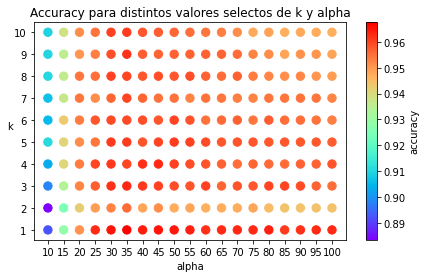

In [42]:
name_k_alpha_extense = "../dataExp/KNN_PCA_extense.csv"
plot_scatter(name_k_alpha_extense, "Accuracy para distintos valores selectos de k y alpha", (7,4))

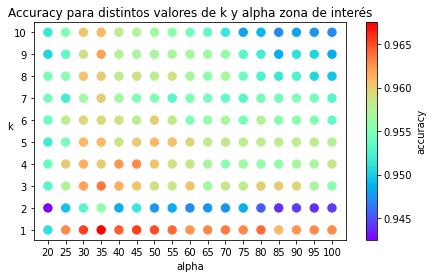

In [51]:
import matplotlib.pyplot as plt
import numpy as np

filename = "../dataExp/KNN_PCA_extense.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df[df["alpha"] >= 20] 

plot_scatter_df(df, "Accuracy para distintos valores de k y alpha zona de interés")


# Imprimir ordenados

In [102]:
filename = "../dataExp/KNN_PCA_extense.csv"

# Grafica los datos obtenidos para los distintos k y alpha
columns = ["k", "alpha", "time", "acc"]
df = pd.read_csv(filename, names=columns)
df = df.sort_values("acc", ascending=False)
ranking = range(1,len(df["acc"])+1)
df["rank"] = ranking
print(df)

        k  alpha       time     acc  rank
50    1.0   35.0   6.983079  0.9675     1
70    1.0   45.0   8.045151  0.9655     2
40    1.0   30.0   6.831399  0.9655     3
80    1.0   50.0   8.223451  0.9650     4
60    1.0   40.0   8.244189  0.9645     5
140   1.0   80.0  12.119491  0.9640     6
90    1.0   55.0   9.048980  0.9640     7
120   1.0   70.0  10.774125  0.9635     8
52    3.0   35.0   7.085550  0.9635     9
73    4.0   45.0   8.220729  0.9630    10
180   1.0  100.0  18.913546  0.9630    11
170   1.0   95.0  14.829297  0.9630    12
110   1.0   65.0  10.191884  0.9630    13
130   1.0   75.0  11.831183  0.9630    14
30    1.0   25.0   6.759549  0.9630    15
63    4.0   40.0   8.332384  0.9625    16
100   1.0   60.0   9.682708  0.9625    17
160   1.0   90.0  14.091987  0.9625    18
58    9.0   35.0   7.396508  0.9620    19
42    3.0   30.0   6.934864  0.9620    20
62    3.0   40.0   8.276679  0.9615    21
43    4.0   30.0   6.995933  0.9615    22
150   1.0   85.0  13.906134  0.961

##### Experimentar con el alpha
- Research paper de buenos alphas
- **Experimentar**: Experimentacion similar a la de K pero el inicial talvez mejor hasta 600 o algo del estilo para tener un panorama mas completo ya que no se espepra que al aumentarlo empeore necesariamente


# Experimentar con la cantidad de instancias 
- para los k y alpha obtenidos en exp1 vamos a experimentar con el porcentage de las instancias
 ver para un mismo train set si distintos tamaño de test_set obtienen resultados muy disntintos

### Rangos de datos utilizados
empezamos en 100 para al menos tener un par de referencias para cada digito
- Cantidad de instancias de train: 100, 1000, 5000, 10000, 15000, 20000

In [17]:
# for
#    experimentacion_k_alpha(name_k_alpha_complete, ks, alphas, total_instances)

def main(filename, k, alpha, method, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

    clf = metnum.KNNClassifier(k)
    
    if (method == "KNN"):
        clf.fit(X_train, label_train)
        
    if (method == "KNN_PCA"):
        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
        clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))
    return acc

# Posible metodo KNN pesado
- Por orden(sencillo pero no tan bueno talvez)
- Por distancia con peso

# Metricas para determinar los resultados obtenidos que no son accuracy
- Accuracy
- Curvas de precisión
- Recall
- Kappa de Cohen
- F1 Score

# Formas de tomar la data para entrenar
- Ver la distribución de los datos
- Como tomarlos

# Otros requisitos
- Se pide realizar un estudio experimental de los métodos propuestos sobre una base de
entrenamiento utilizando la técnica K-fold cross validation mencionada anteriormente, con
el objetivo de analizar el poder de clasificación y encontrar los mejores parámetros de los
métodos. Se deberá trabajar al menos con la base de de datos MNIST, en la versión disponible
en kaggle para la competencia Digit Recognizer 2 .

# Kaggle code


In [6]:
filename = "../data/train.csv"
test_filename = "../data/test.csv"
k = 1
alpha = 35 
method = "KNN_PCA"
num_iter = 2500
epsilon = 1e-6

asd = list(range(1,20+1))
print(asd)

df_train = pd.read_csv(filename)

# Uso values para mandar todo a arrays de numpy
X_train = df_train[df_train.columns[1:]].values
label_train = df_train["label"].values.reshape(-1, 1)

df_test = pd.read_csv(test_filename)

clf = metnum.KNNClassifier(k)


pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(df_test)

clf.fit(X_train, label_train) 


label_pred = clf.predict(X_val)

ran = list(range(1,len(label_pred)+1))

np.savetxt("../dataExp/kaggleSub.csv", np.array([ran, label_pred]).transpose().astype(int), fmt='%i', delimiter=",")


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
